# Simple tutorial for using TensorFlow to compute a linear regression.

 Parag K. Mital, Jan. 2016 | David Ojo , Jul 2018

#  Import Tensorflow and Plotting Libary

In [105]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Let's create some toy data

c:\users\david ojo\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


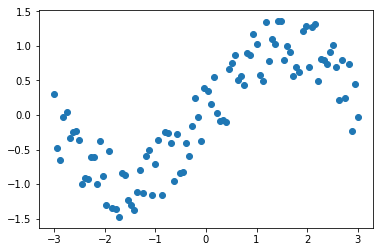

In [106]:
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
ax.scatter(xs, ys)
fig.show()
plt.draw()

#  tf.placeholders for the input and output of the network. 
#### Placeholders are variables which we need to fill in when we are ready to compute the graph.

In [107]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#  We will try to optimize 
## [ min_(W,b) ||(X*w + b) - y||^2 ]
### The `Variable()` constructor requires an initial value for the variable, which can be a `Tensor` of any type and shape. The initial value defines the type and shape of the variable. After construction, the type and shape of the variable are fixed. The value can be changed using one of the assign methods.

In [108]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
Y_pred = tf.add(tf.multiply(X, W), b)

In [109]:
# %% Loss function will measure the distance between our observations
# and predictions and average over them.
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observations - 1)

###  If we wanted to add regularization, we could add other terms to the cost, e.g. ridge regression has a parameter controlling the amount of shrinkage over the norm of activations. The larger the shrinkage, the more robust to collinearity. cost = tf.add(cost, tf.mul(1e-6, tf.global_norm([W])))

#  Use gradient descent to optimize W,b
### Performs a single step in the negative gradient

In [110]:
learning_rate = 0.0001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# We create a session to use the graph

In [111]:
n_epochs = 3000
display_step = 50
error = []
with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    sess.run(tf.initialize_all_variables())

    # Fit all training data
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        error.append(training_cost)

        #Display logs per epoch step
        if (epoch_i+1) % display_step == 0:
            print( "Epoch:", '%04d' % (epoch_i+1), "cost=", "{:.9f}".format(training_cost), \
            "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')


Epoch: 0050 cost= 2.361820936 W= [ 0.26469734] b= [-1.40508974]
Epoch: 0100 cost= 2.319392920 W= [ 0.26712069] b= [-1.39073384]
Epoch: 0150 cost= 2.277817011 W= [ 0.26946932] b= [-1.37650669]
Epoch: 0200 cost= 2.237076044 W= [ 0.27174097] b= [-1.36240733]
Epoch: 0250 cost= 2.197304010 W= [ 0.27394846] b= [-1.34849083]
Epoch: 0300 cost= 2.158350706 W= [ 0.27608675] b= [-1.33470845]
Epoch: 0350 cost= 2.120077848 W= [ 0.27815846] b= [-1.32101488]
Epoch: 0400 cost= 2.082678318 W= [ 0.28016955] b= [-1.3074863]
Epoch: 0450 cost= 2.046139002 W= [ 0.28212023] b= [-1.29412377]
Epoch: 0500 cost= 2.010301113 W= [ 0.28401053] b= [-1.28087294]
Epoch: 0550 cost= 1.975159168 W= [ 0.28584301] b= [-1.26773632]
Epoch: 0600 cost= 1.940770984 W= [ 0.28762031] b= [-1.25474107]
Epoch: 0650 cost= 1.907181501 W= [ 0.2893447] b= [-1.24190998]
Epoch: 0700 cost= 1.874173880 W= [ 0.29101467] b= [-1.22916293]
Epoch: 0750 cost= 1.841893673 W= [ 0.29263362] b= [-1.21656179]
Epoch: 0800 cost= 1.810298085 W= [ 0.29420

# Plot data after completing training

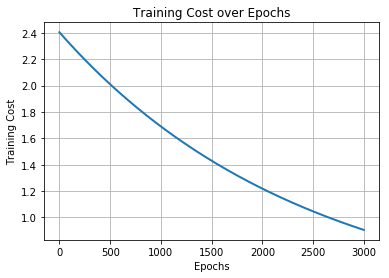

In [112]:
#Graphic display
plt.plot(error, linewidth=2.0)
plt.xlabel('Epochs')
plt.ylabel('Training Cost')
plt.title('Training Cost over Epochs')
plt.grid(True)

coord.request_stop()
coord.join(threads)